[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/corazzon/finance-data-analysis/blob/main/3.2%20FinanceDataReader%EB%A5%BC%20%ED%86%B5%ED%95%9C%20%EC%97%AC%EB%9F%AC%20%EC%A2%85%EB%AA%A9%20%EC%88%98%EC%9D%B5%EB%A5%A0%20%EB%B9%84%EA%B5%90-output.ipynb)

* **이번 노트북의 실습은 FinanceDataReader의 여러 종목 가격을 한번에** 자료를 참고하여 만들어 졌습니다.
* 참고 링크 :  [FinanceDataReader 여러 종목 가격을 한번에](https://nbviewer.jupyter.org/github/FinanceData/FinanceDataReader/blob/master/tutorial/FinanceDataReader%20Tutorial%20-%20%EC%97%AC%EB%9F%AC%20%EC%A2%85%EB%AA%A9%EC%9D%98%20%EA%B0%80%EA%B2%A9%EC%9D%84%20%ED%95%9C%EB%B2%88%EC%97%90.ipynb)


## 라이브러리 불러오기

In [1]:
# 데이터 분석을 위해 pandas 불러오기
import pandas as pd

* [FinanceData/FinanceDataReader: Financial data reader](https://github.com/FinanceData/FinanceDataReader)
* [FinanceDataReader 사용자 안내서 | FinanceData](https://financedata.github.io/posts/finance-data-reader-users-guide.html)

In [2]:
# colab 을 사용한다면 런타임이 초기화 될때마다 다시 설치해 주어야 합니다.
# 로컬 컴퓨터에 설치했다면 이전에 설치된 라이브러리를 사용해 주시면 됩니다.
# !pip install -U finance-datareader

In [3]:
# FinanceDataReader 를 fdr 별칭으로 불러오기
import FinanceDataReader as fdr

## 상장종목 목록 가져오기

In [4]:
# 불러올 종가의 목록 입니다.
stock_dict = {
    '삼성전자': '005930',
    'SK하이닉스': '000660',
    '현대차': '005380',
    '셀트리온': '068270',
    'LG전자': '066570',
    'POSCO': '005490',
    '삼성물산': '028260',
    'NAVER': '035420'}
stock_dict

{'삼성전자': '005930',
 'SK하이닉스': '000660',
 '현대차': '005380',
 '셀트리온': '068270',
 'LG전자': '066570',
 'POSCO': '005490',
 '삼성물산': '028260',
 'NAVER': '035420'}

In [5]:
# stock_dict 변수의 타입을 봅니다.
type(stock_dict)

dict

In [6]:
# dict 는 key:value 구조 입니다. key만 봅니다.
stock_dict.keys()

dict_keys(['삼성전자', 'SK하이닉스', '현대차', '셀트리온', 'LG전자', 'POSCO', '삼성물산', 'NAVER'])

In [7]:
# dict 는 key:value 구조 입니다. value만 봅니다.
stock_dict.values()

dict_values(['005930', '000660', '005380', '068270', '066570', '005490', '028260', '035420'])

## 여러 종목의 종가 수집
* 종목코드로 수집이 가능합니다.
* 종목명을 찾아서 일별 시세를 수집해 주는 함수를 만들어 볼 예정입니다.

In [15]:
# 반복문을 사용하여 여러 종목의 종가를 수집합니다.
item_list = []
for item_code in stock_dict.values():
    close = fdr.DataReader(item_code, "2015", "2022")['Close']
    item_list.append(close)

In [16]:
len(item_list)

8

In [17]:
fdr.DataReader(item_code)['Close']

Date
2002-10-29      2312
2002-10-30      2588
2002-10-31      2459
2002-11-01      2305
2002-11-04      2191
               ...  
2021-09-02    442500
2021-09-03    452500
2021-09-06    454000
2021-09-07    444500
2021-09-08    409500
Name: Close, Length: 4668, dtype: int64

In [18]:
type(fdr.DataReader(item_code)['Close'])

pandas.core.series.Series

### 하나의 데이터프레임으로 합치기


* axis = 0

<img src="https://pandas.pydata.org/docs/_images/merging_concat_basic.png">

* axis = 1 
<img src="https://pandas.pydata.org/docs/_images/merging_concat_axis1.png">

* 결측치를 제외하기 join="inner"
<img src="https://pandas.pydata.org/docs/_images/merging_concat_axis1_inner.png">


* [Merge, join, concatenate and compare documentation](https://pandas.pydata.org/docs/user_guide/merging.html#merge-join-concatenate-and-compare)

In [19]:
item_list

[Date
 2015-01-02    26600
 2015-01-05    26660
 2015-01-06    25900
 2015-01-07    26140
 2015-01-08    26280
               ...  
 2021-09-02    76000
 2021-09-03    76600
 2021-09-06    77300
 2021-09-07    76100
 2021-09-08    76300
 Name: Close, Length: 1647, dtype: int64,
 Date
 2015-01-02     47750
 2015-01-05     47650
 2015-01-06     47500
 2015-01-07     47400
 2015-01-08     49950
                ...  
 2021-09-02    106500
 2021-09-03    107000
 2021-09-06    106000
 2021-09-07    104500
 2021-09-08    106000
 Name: Close, Length: 1647, dtype: int64,
 Date
 2015-01-02    169000
 2015-01-05    168000
 2015-01-06    164500
 2015-01-07    170000
 2015-01-08    178000
                ...  
 2021-09-02    211500
 2021-09-03    214500
 2021-09-06    215000
 2021-09-07    212500
 2021-09-08    213000
 Name: Close, Length: 1647, dtype: int64,
 Date
 2015-01-02     32741
 2015-01-05     32573
 2015-01-06     31987
 2015-01-07     31695
 2015-01-08     31863
                ...  
 20

In [20]:
# 수집한 리스트를 axis=1(컬럼)을 기준으로 병합(concat) 합니다. (세로로 붙이기 )
# 이 때, 컬럼은 stock_dict 의 key 값을 사용합니다.
df = pd.concat(item_list, axis=1)
df.columns = stock_dict.keys()
df

,삼성전자,SK하이닉스,현대차,셀트리온,LG전자,POSCO,삼성물산,NAVER
Date,,,,,,,,
2015-01-02,26600,47750,169000,32741,58800,283500,171000,146407
2015-01-05,26660,47650,168000,32573,58400,279000,145500,150012
2015-01-06,25900,47500,164500,31987,60100,275000,138500,148811
2015-01-07,26140,47400,170000,31695,60000,279500,135500,146607
2015-01-08,26280,49950,178000,31863,62200,286000,135000,149011
...,...,...,...,...,...,...,...,...
2021-09-02,76000,106500,211500,288000,139500,342500,131500,442500
2021-09-03,76600,107000,214500,283000,153500,348000,132000,452500
2021-09-06,77300,106000,215000,278500,148000,349000,132000,454000


### 시각화를 위한 폰트 설정

* 그래프의 다양한 style 설정 : [Customizing Matplotlib with style sheets and rcParams — Matplotlib documentation](https://matplotlib.org/3.3.3/tutorials/introductory/customizing.html)

In [24]:
import matplotlib.pyplot as plt
# 폰트설정
plt.rc('font',family='Malgun Gothic')
# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)
# ggplot으로 그래프 스타일 설정
plt.style.use("ggplot")
# 그래프에 retina display 적용
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

<AxesSubplot:title={'center':'한글폰트'}>

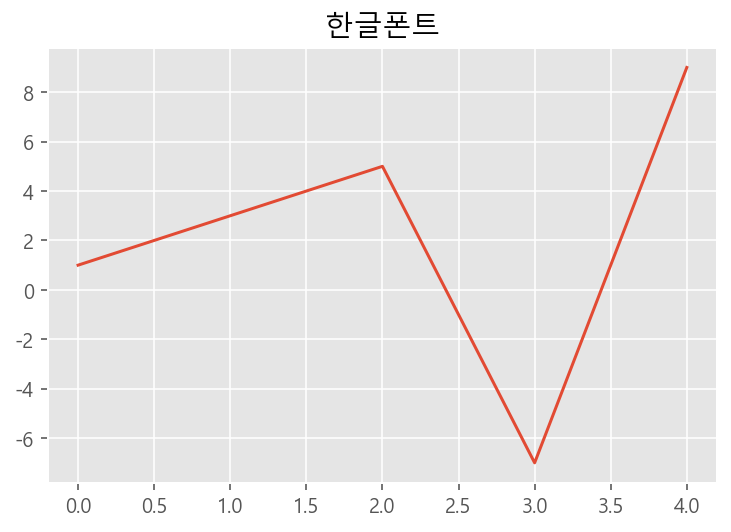

In [25]:
pd.Series([1, 3, 5, -7, 9]).plot(title="한글폰트")

## 여러 종목 한번에 시각화 하기

<AxesSubplot:xlabel='Date'>

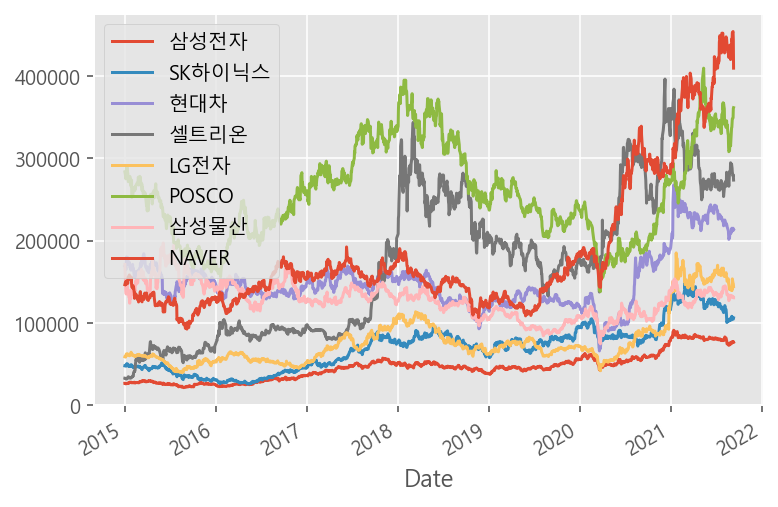

In [26]:
# 판다스의 plot을 통한 전체 데이터 프레임 시각화
df.plot()

<AxesSubplot:xlabel='Date'>

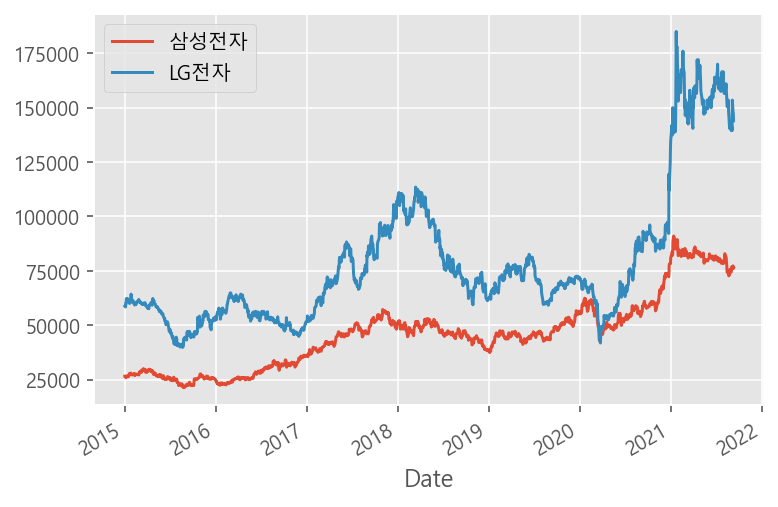

In [27]:
# 2개의 종목 비교하기 : "삼성전자", "LG화학" 을 plot으로 시각화 합니다.
df[["삼성전자", "LG전자"]].plot()

## 2축 그래프 사용하기

<AxesSubplot:xlabel='Date'>

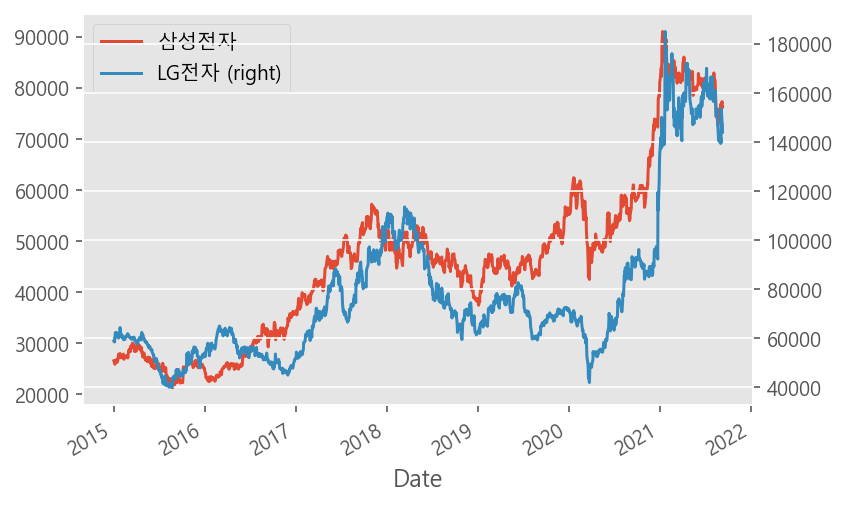

In [28]:
# secondary_y를 사용해 2축 그래프 그리기

df[["삼성전자", "LG전자"]].plot(secondary_y="LG전자")

In [41]:
df.describe()

,삼성전자,SK하이닉스,현대차,셀트리온,LG전자,POSCO,삼성물산,NAVER
count,1647.000000,1647.000000,1647.000000,1647.000000,1647.000000,1647.000000,1647.000000,1647.000000
mean,46072.477231,70114.480874,150053.309047,171622.913783,78103.551913,258212.811172,127827.261688,184190.321190
std,16589.293626,28544.829722,34184.761723,88682.846378,30987.458039,57555.631916,20856.213849,83812.695408
min,21340.000000,25750.000000,65900.000000,31695.000000,39800.000000,138000.000000,74500.000000,92431.000000
25%,31360.000000,45800.000000,129000.000000,88728.500000,57650.000000,214500.000000,112000.000000,130985.000000
50%,46040.000000,73300.000000,144000.000000,171851.000000,69100.000000,253000.000000,128500.000000,155220.000000
75%,52790.000000,83700.000000,161500.000000,254334.000000,87300.000000,304250.000000,141000.000000,179254.000000
max,91000.000000,148500.000000,267500.000000,396240.000000,185000.000000,409500.000000,197000.000000,454000.000000


## 기간 수익률 비교하기
* 가격마다 스케일이 다르기 때문에 데이터프레임 기준 첫날을 0으로 맞추고 상대적으로 상승했는지 하락했는지에 대한 값을 구합니다.
* 다른 스케일 값의 상승/하락 비율을 비교해 볼 수 있도록 합니다.
* 다른 스케일의 값을 조정할 때 표준화 혹은 정규화 방법을 사용하기도 합니다.
    * 표준화(standardization) : 
        * 데이터가 평균으로 부터 얼마나 떨어져 있는지 나타내는 값으로 변환
        * (Z-score 표준화) : (측정값 - 평균) / 표준편차
    * 정규화(normalization) : 
        * 데이터의 상대적 크기에 대한 영향을 줄이기 위해 0~1로 변환
        * (측정값 - 최소값) / (최대값 - 최소값)
        
참고 : https://soo-jjeong.tistory.com/123

In [42]:
# df2 변수에 'LG화학', '삼성전자' 만 따로 가져옵니다.
# 첫번째 날 가격으로 나머지 가격을 나눠주고 -1을 해주면 수익률을 구할 수 있습니다.
# df_plot 에 수익률을 담아줍니다.
df2 = df[['LG전자', '삼성전자']]
df2

,LG전자,삼성전자
Date,,
2015-01-02,58800,26600
2015-01-05,58400,26660
2015-01-06,60100,25900
2015-01-07,60000,26140
2015-01-08,62200,26280
...,...,...
2021-09-02,139500,76000
2021-09-03,153500,76600
2021-09-06,148000,77300


In [43]:
df2.iloc[0]

LG전자    58800
삼성전자    26600
Name: 2015-01-02 00:00:00, dtype: int64

In [44]:
df_plot = df2 / df2.iloc[0] - 1 # 첫 번쨰 시점에서의 누적 수익률 계산하기 위해 -1 적용
df_plot                         

,LG전자,삼성전자
Date,,
2015-01-02,0.000000,0.000000
2015-01-05,-0.006803,0.002256
2015-01-06,0.022109,-0.026316
2015-01-07,0.020408,-0.017293
2015-01-08,0.057823,-0.012030
...,...,...
2021-09-02,1.372449,1.857143
2021-09-03,1.610544,1.879699
2021-09-06,1.517007,1.906015


In [30]:
df2

,LG전자,삼성전자
Date,,
2015-01-02,58800,26600
2015-01-05,58400,26660
2015-01-06,60100,25900
2015-01-07,60000,26140
2015-01-08,62200,26280
...,...,...
2021-09-02,139500,76000
2021-09-03,153500,76600
2021-09-06,148000,77300


<AxesSubplot:xlabel='Date'>

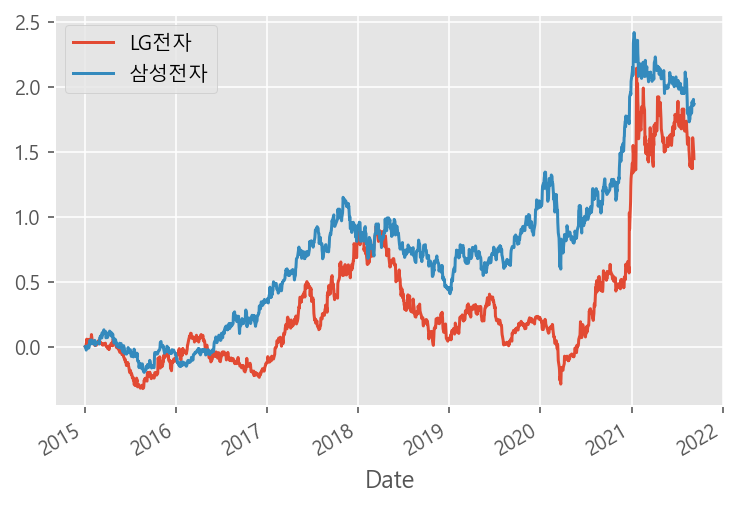

In [31]:
# 수익률 시각화 하기
df_plot.plot()

## pyplot의 subplots 로 서브플롯 그리기

<AxesSubplot:title={'center':'수익률 그래프'}, xlabel='Date'>

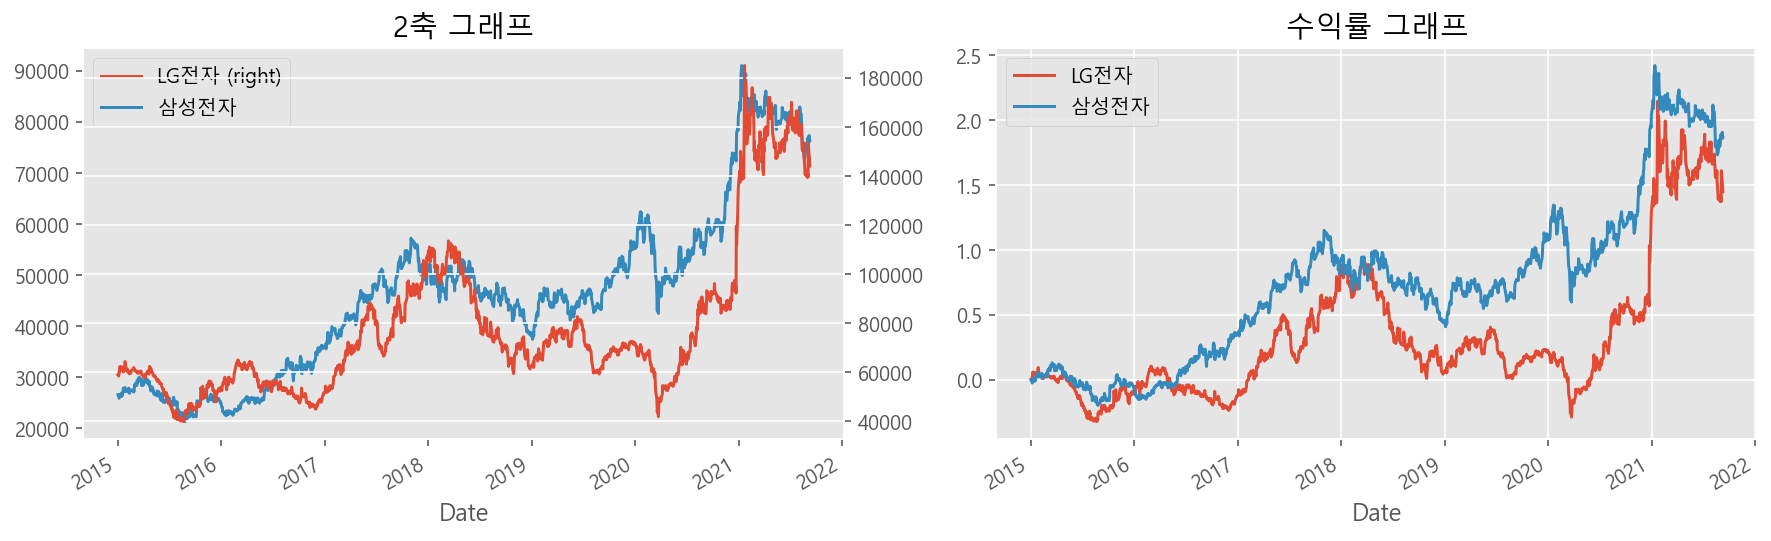

In [32]:
# pyplot의 subplots로 2개의 서브플롯을 만들고 2축그래프와 수익률 그래프를 비교해 봅니다.
fig, axes = plt.subplots(1, 2, figsize=(15, 4))

df[["LG전자", "삼성전자"]].plot(secondary_y="LG전자", ax=axes[0], title="2축 그래프")
df_plot.plot(ax=axes[1], title="수익률 그래프")

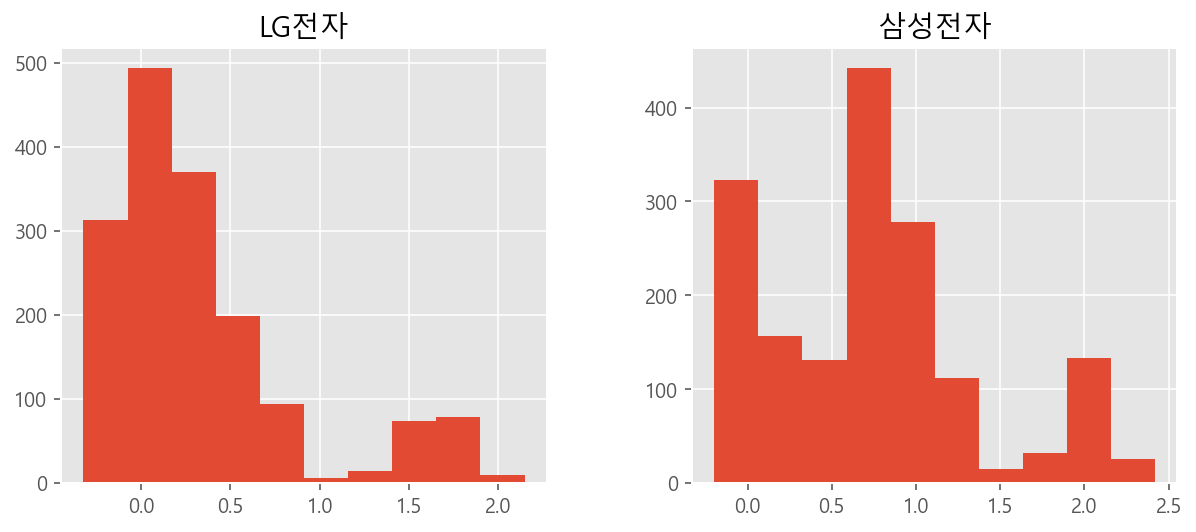

In [33]:
# df_plot 데이터프레임을 통해 수익률의 분포를 histogram으로 시각화 합니다.
h = df_plot.hist(figsize=(10, 4), bins=10) # 0 이상으로 수익률이 나있는 종목이 좋다

## 전체 데이터프레임 값에 대한 수익률 계산하기

In [34]:
# 첫번째 날 가격으로 나머지 가격을 나눠주고 -1을 해주면 수익률을 구할 수 있습니다.
df_norm = df / df.iloc[0] - 1
df_norm

,삼성전자,SK하이닉스,현대차,셀트리온,LG전자,POSCO,삼성물산,NAVER
Date,,,,,,,,
2015-01-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2015-01-05,0.002256,-0.002094,-0.005917,-0.005131,-0.006803,-0.015873,-0.149123,0.024623
2015-01-06,-0.026316,-0.005236,-0.026627,-0.023029,0.022109,-0.029982,-0.190058,0.016420
2015-01-07,-0.017293,-0.007330,0.005917,-0.031948,0.020408,-0.014109,-0.207602,0.001366
2015-01-08,-0.012030,0.046073,0.053254,-0.026817,0.057823,0.008818,-0.210526,0.017786
...,...,...,...,...,...,...,...,...
2021-09-02,1.857143,1.230366,0.251479,7.796310,1.372449,0.208113,-0.230994,2.022396
2021-09-03,1.879699,1.240838,0.269231,7.643597,1.610544,0.227513,-0.228070,2.090699
2021-09-06,1.906015,1.219895,0.272189,7.506154,1.517007,0.231041,-0.228070,2.100945


### 전체 종목의 수익률 시각화

<AxesSubplot:xlabel='Date'>

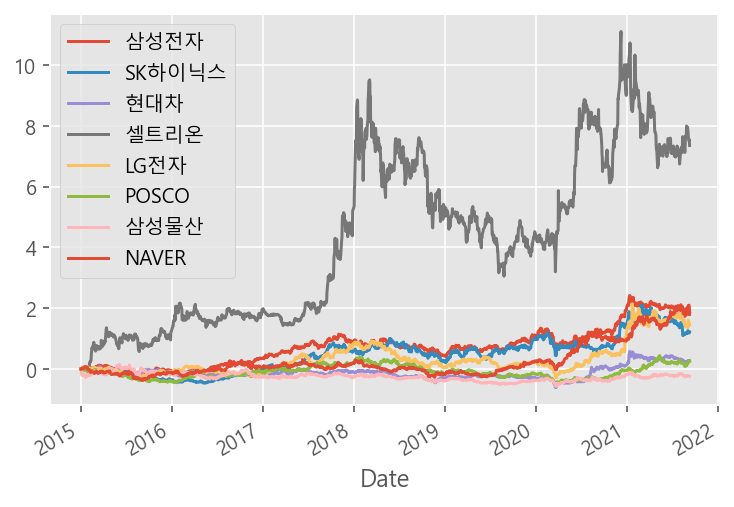

In [35]:
# df_norm 변수에 담긴 전체 종목에 대한 수익률을 시각화 합니다.
df_norm.plot()

In [36]:
# 계산된 수익률에 대한 기술통계값 구하기
df_norm.describe()

,삼성전자,SK하이닉스,현대차,셀트리온,LG전자,POSCO,삼성물산,NAVER
count,1647.000000,1647.000000,1647.000000,1647.000000,1647.000000,1647.000000,1647.000000,1647.000000
mean,0.732048,0.468366,-0.112111,4.241835,0.328292,-0.089196,-0.252472,0.258070
std,0.623658,0.597797,0.202277,2.708618,0.526998,0.203018,0.121966,0.572464
min,-0.197744,-0.460733,-0.610059,-0.031948,-0.323129,-0.513228,-0.564327,-0.368671
25%,0.178947,-0.040838,-0.236686,1.710012,-0.019558,-0.243386,-0.345029,-0.105336
50%,0.730827,0.535079,-0.147929,4.248801,0.175170,-0.107584,-0.248538,0.060195
75%,0.984586,0.752880,-0.044379,6.768058,0.484694,0.073192,-0.175439,0.224354
max,2.421053,2.109948,0.582840,11.102257,2.146259,0.444444,0.152047,2.100945


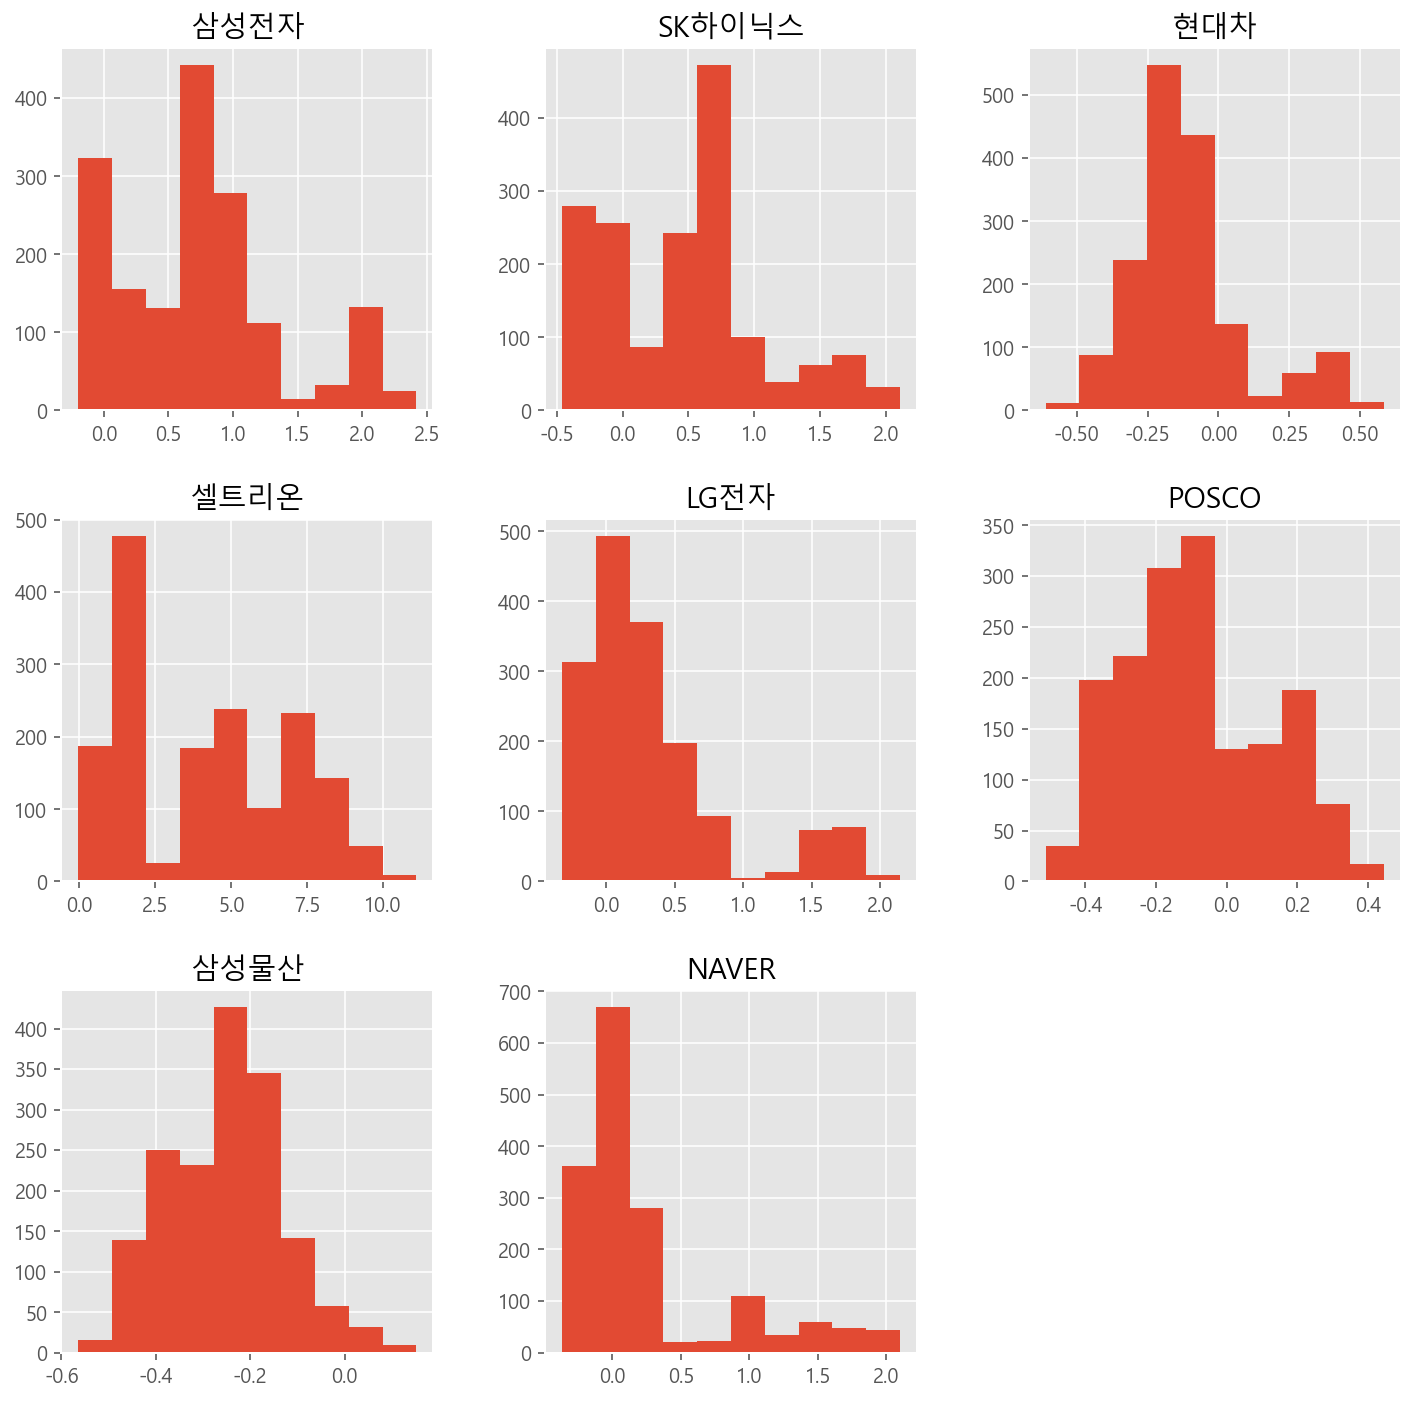

In [37]:
# 수익률에 대한 히스토그램 그리기
h = df_norm.hist(figsize=(12, 12))   # 정규분포 현황 (0보다 이상인 구간이 많을수록 좋다)

## 왜도와 첨도

* 히스토그램의 분포를 추정해서 밀도추정곡선을 그리기도 합니다.
* 여기에서는 왜도와 첨도를 구해 각 종목의 수익률 분포를 수치화된 데이터로 구해봅니다.

### 왜도
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Negative_and_positive_skew_diagrams_%28English%29.svg/700px-Negative_and_positive_skew_diagrams_%28English%29.svg.png" width="600">



<img src="https://upload.wikimedia.org/wikipedia/commons/c/cc/Relationship_between_mean_and_median_under_different_skewness.png" width="600">


* 비대칭도(非對稱度, skewness) 또는 왜도(歪度)는 실수 값 확률 변수의 확률 분포 비대칭성을 나타내는 지표이다. 왜도의 값은 양수나 음수가 될 수 있으며 정의되지 않을 수도 있다. 
    * 왜도가 음수일 경우에는 확률밀도함수의 왼쪽 부분에 긴 꼬리를 가지며 중앙값을 포함한 자료가 오른쪽에 더 많이 분포해 있다. 
    * 왜도가 양수일 때는 확률밀도함수의 오른쪽 부분에 긴 꼬리를 가지며 자료가 왼쪽에 더 많이 분포해 있다는 것을 나타낸다. 
    * 평균과 중앙값이 같으면 왜도는 0이 된다.
    
* 출처 : [비대칭도 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EB%B9%84%EB%8C%80%EC%B9%AD%EB%8F%84)

In [38]:
# skew 로 수익률의 왜도를 구합니다.
df_norm.skew()

삼성전자      0.683035
SK하이닉스    0.446605
현대차       1.108071
셀트리온      0.270186
LG전자      1.547520
POSCO     0.325169
삼성물산      0.158599
NAVER     1.669792
dtype: float64

### 첨도

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/33/Standard_symmetric_pdfs.svg/1920px-Standard_symmetric_pdfs.svg.png" width="200">

* 첨도(尖度, 영어: kurtosis 커토시스)는 확률분포의 뾰족한 정도를 나타내는 척도이다. 관측치들이 어느 정도 집중적으로 중심에 몰려 있는가를 측정할 때 사용된다. 
    * 첨도값(K)이 3에 가까우면 산포도가 정규분포에 가깝다. 
    * 3보다 작을 경우에는(K<3) 정규분포보다 더 완만하게 납작한 분포로 판단할 수 있으며, 
    * 첨도값이 3보다 큰 양수이면(K>3) 산포는 정규분포보다 더 뾰족한 분포로 생각할 수 있다.

* 출처 : [첨도 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EC%B2%A8%EB%8F%84)

In [39]:
# kurt 로 첨도를 구합니다.
df_norm.kurt()

삼성전자      0.016340
SK하이닉스   -0.285337
현대차       1.312861
셀트리온     -1.215534
LG전자      1.693990
POSCO    -0.769053
삼성물산     -0.096745
NAVER     1.714018
dtype: float64